In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

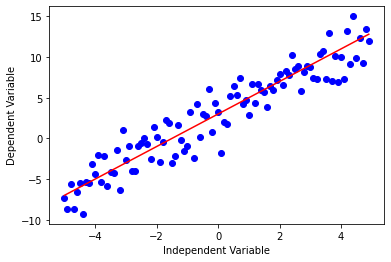

In [2]:
x = np.arange(-5.0, 5.0, 0.1)

y = 2 * (x) + 3
yNoise = 2 * np.random.normal(size = x.size)
yData = y + yNoise

plt.plot(x, yData, 'bo')
plt.plot(x, y, 'r')
plt.xlabel('Independent Variable')
plt.ylabel('Dependent Variable')
plt.show()

Cubic function as a non linear regression graph

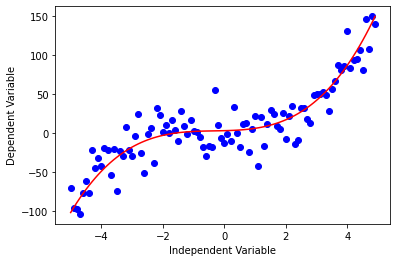

In [4]:
x = np.arange(-5.0, 5.0, 0.1)
y = 1 * (x ** 3) + 1 * (x ** 2) + 1 * x + 3
yNoise = 20 * np.random.normal(size = x.size)
yData = y + yNoise

plt.plot(x, yData, 'bo')
plt.plot(x, y, 'r')
plt.xlabel('Independent Variable')
plt.ylabel('Dependent Variable')
plt.show()

Quadratic function as non linear regression graph

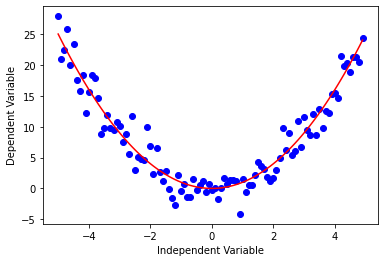

In [12]:
x = np.arange(-5.0, 5.0, 0.1)
y = np.power(x, 2)
yNoise = 2 * np.random.normal(size = x.size)
yData = y + yNoise

plt.plot(x, yData, 'bo')
plt.plot(x, y, 'r')
plt.xlabel('Independent Variable')
plt.ylabel('Dependent Variable')
plt.show()

#### Non Linear Regression GDP example dataset

In [18]:
import numpy as np
import pandas as pd

!wget -nv -O china_gdp.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/china_gdp.csv

2020-05-27 20:56:08 URL:https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/china_gdp.csv [1218/1218] -> "china_gdp.csv" [1]


In [20]:
df = pd.read_csv('china_gdp.csv')
df.head(10)

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10
5,1965,6.970915e+10
6,1966,7.587943e+10
7,1967,7.205703e+10
8,1968,6.999350e+10
9,1969,7.871882e+10


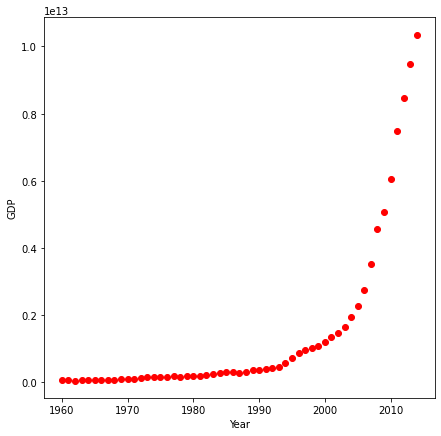

In [22]:
plt.figure(figsize = (7, 7))
xData, yData = (df['Year'].values, df['Value'].values)

plt.plot(xData, yData, 'ro')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.show()

Graph looks like a logistic function which is given by :

$$ \hat{Y} = \frac1{1+e^{\beta_1(X-\beta_2)}}$$

$\beta_1$: Controls the curve's steepness,

$\beta_2$: Slides the curve on the x-axis.

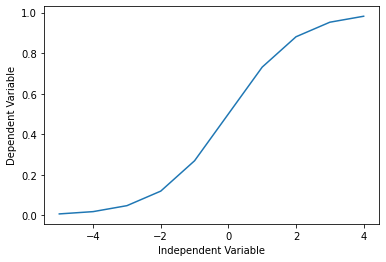

In [23]:
x = np.arange(-5.0, 5.0, 1.0)
y = 1.0 / (1.0 + np.exp(-x))

plt.plot(x, y)
plt.xlabel('Independent Variable')
plt.ylabel('Dependent Variable')
plt.show()

Building the model

In [24]:
def sigmoid(x, beta1, beta2):
    y = 1 /  (1 + np.exp(-beta1 * (x - beta2)))
    return y

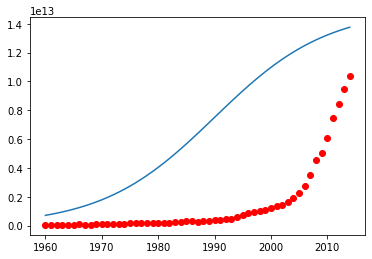

In [26]:
beta1 = 0.10
beta2 = 1990.0

yPredicted = sigmoid(xData, beta1, beta2)

#plotting intial prediction against the datapoints
plt.plot(xData, yPredicted * 15000000000000.)
plt.plot(xData, yData, 'ro')

Normalizine the data

In [27]:
xData = xData / max(xData)
yData = yData / max(yData)

curve_fit can be used to find the best parameters to fit our line which uses non-linear leasst squares to fit the sigmoid function to the data

In [29]:
from scipy.optimize import curve_fit

popt, pcov = curve_fit(sigmoid, xData, yData)
# Final parameters after fitting
print("Beta 1 = %f \nBeta 2 = %f" % (popt[0], popt[1]))

Beta 1 = 690.451710 
Beta 2 = 0.997207


Plotting the resulting regression model

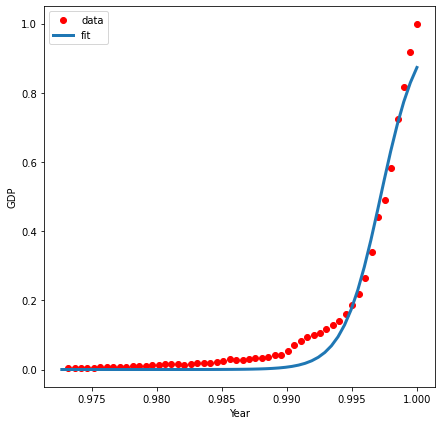

In [32]:
x = np.linspace(1960, 2015, 55)
x = x / max(x)
y = sigmoid(x, *popt)

plt.figure(figsize = (7,7))
plt.plot(xData, yData, 'ro', label = 'data')
plt.plot(x, y, linewidth = 3.0, label = 'fit')
plt.legend(loc = 'best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

Calculating accuracy of the model

In [34]:
from sklearn.metrics import r2_score

mask = np.random.rand(len(df)) < 0.8
trainX = xData[mask]
trainY = yData[mask]
testX = xData[~mask]
testY = yData[~mask]

# Building model using the training split
popt, pcov = curve_fit(sigmoid, trainX, trainY)

# Predicting using test set
yHat = sigmoid(testX, *popt)

# Evaluation
print('Mean absolute error = %.2f' % np.mean(np.absolute(yHat - testY)))
print('Residual sum of squares (MSE) = %.2f' % np.mean((yHat - testY) ** 2))
print('R2-score = %.2f' % r2_score(yHat, testY))

Mean absolute error = 0.14
Residual sum of squares (MSE) = 0.10
R2-score = -837705215015841647290220544.00


/home/abettrus/.local/lib/python3.7/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
